### Not benchmarking. There is a bug for msstas. see datails https://github.com/Vitek-Lab/MSstats/issues/65

#### E. coli spiked-in Label-free Data Set. E. coli proteome was prepared into two conditions with 1:3 ratio (10 ug versus 30 ug) in the triplicates and added into equal amount of human proteome background (50 ug hela cells protein extract) and focusing into 24 fractions 

In [1]:
%load_ext rpy2.ipython

C:\Users\ChengXin\MyProgram\python\anaconda\pro\lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  "The symbol '%s' is not in this R namespace/package." % name


In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import urllib

In [3]:
%%R
data_folder = '../datasets/PXD000279'
setwd(data_folder)

In [9]:
url = "http://ftp.pride.ebi.ac.uk/pride/data/proteomes/proteogenomics/benchmakrs/PXD000279/proteomicslfq/out_msstats.csv"
r = urllib.request.urlretrieve(url, 'out_msstats.csv')

ContentTooShortError: <urlopen error retrieval incomplete: got only 2148408 out of 75502870 bytes>

In [4]:
quantms = pd.read_csv("./out_msstats.csv", sep=',', header=0)
quantms = quantms[-quantms['ProteinName'].str.contains("DECOY_")]
print(len(set(quantms['ProteinName'])))
quantms.head()

6578


,ProteinName,PeptideSequence,PrecursorCharge,FragmentIon,ProductCharge,IsotopeLabelType,Condition,BioReplicate,Run,Fraction,Intensity,Reference
0,sp|Q86U42|PABP2_HUMAN,.(Acetyl)AAAAAAAAAAGAAGGR,2,NaN,0,L,10 ug,1,10,10,72228910.0,20070924_CL_Orbi2_XIC_Hela60_Ecoli10_Offgel_re...
1,sp|Q86U42|PABP2_HUMAN,.(Acetyl)AAAAAAAAAAGAAGGR,2,NaN,0,L,30 ug,2,100,4,8371800.0,20070921_CL_Orbi2_XIC_Hela60_Ecoli30_Offgel_gr...
2,sp|Q86U42|PABP2_HUMAN,.(Acetyl)AAAAAAAAAAGAAGGR,2,NaN,0,L,30 ug,2,101,5,25118790.0,20070921_CL_Orbi2_XIC_Hela60_Ecoli30_Offgel_gr...
3,sp|Q86U42|PABP2_HUMAN,.(Acetyl)AAAAAAAAAAGAAGGR,2,NaN,0,L,30 ug,2,104,8,33914750.0,20070923_CL_Orbi2_XIC_Hela60_Ecoli30_Offgel_gr...
4,sp|Q86U42|PABP2_HUMAN,.(Acetyl)AAAAAAAAAAGAAGGR,2,NaN,0,L,30 ug,2,106,10,63519080.0,20070925_CL_Orbi2_XIC_Hela60_Ecoli30_Offgel_gr...


In [5]:
original = pd.read_csv("./proteinGroups.txt", sep='\t', header=0)
original = original[(original['Reverse'] != "+") & (original['Contaminant'] != "+")]
print(len(set(original['Protein IDs'])))
original.head()


6566


,Protein IDs,Majority protein IDs,Peptide counts (all),Peptide counts (razor+unique),Peptide counts (unique),Protein names,Gene names,Fasta headers,Number of proteins,Peptides,...,Contaminant,id,Peptide IDs,Peptide is razor,Mod. peptide IDs,Evidence IDs,MS/MS IDs,Best MS/MS,Oxidation (M) site IDs,Oxidation (M) site positions
0,A0AV96;B7Z8Z7;A0AV96-2;D6R9D6;D6RBS9;D6REZ6;D6...,A0AV96;B7Z8Z7;A0AV96-2;D6R9D6,13;12;11;9;6;5;4;4;4;3;1;1;1;1;1;1;1;1;1;1;1;1;1,13;12;11;9;6;5;4;4;4;3;1;1;1;1;1;1;1;1;1;1;1;1;1,13;12;11;9;6;5;4;4;4;3;1;1;1;1;1;1;1;1;1;1;1;1;1,RNA-binding protein 47,RBM47,>sp|A0AV96|RBM47_HUMAN RNA-binding protein 47 ...,23,13,...,NaN,0,7292;7340;13148;15825;15853;19695;24584;25272;...,True;True;True;True;True;True;True;True;True;T...,7797;7845;13924;16779;16807;20827;25990;26707;...,255335;257154;257155;257156;257157;257158;2571...,162663;163886;163887;163888;163889;163890;1638...,162663;163891;275625;332747;333377;409171;5179...,NaN,NaN
1,A0AVT1;A0AVT1-2;H0Y8S8;A0AVT1-4;A0AVT1-3,A0AVT1;A0AVT1-2,14;11;4;3;3,14;11;4;3;3,14;11;4;3;3,Ubiquitin-like modifier-activating enzyme 6,UBA6,>sp|A0AVT1|UBA6_HUMAN Ubiquitin-like modifier-...,5,14,...,NaN,1,2434;4741;7718;8512;10374;19391;25119;28414;29...,True;True;True;True;True;True;True;True;True;T...,2623;5099;8236;9055;10995;20514;26547;29977;31...,90238;90239;90240;90241;90242;90243;90244;9024...,58512;58513;58514;58515;58516;58517;58518;5851...,58512;111442;170332;183460;218217;402612;52757...,NaN,NaN
2,H7BXI1;A0FGR8-6;A0FGR8-2;A0FGR8;C9JGI7;A0FGR8-...,H7BXI1;A0FGR8-6;A0FGR8-2;A0FGR8;C9JGI7;A0FGR8-4,11;11;10;10;7;7;4;4;2,11;11;10;10;7;7;4;4;2,11;11;10;10;7;7;4;4;2,Extended synaptotagmin-2,ESYT2,>tr|H7BXI1|H7BXI1_HUMAN Extended synaptotagmin...,9,11,...,NaN,2,11806;12676;20871;25925;26588;31522;40418;4216...,True;True;True;True;True;True;True;True;True;T...,12505;13429;22062;27394;28100;33583;42976;4481...,402155;402156;402157;402158;402159;402160;4021...,247591;247592;247593;247594;247595;247596;2475...,247599;265351;438954;541486;555471;651458;8038...,NaN,NaN
3,A0JLT2;A0JLT2-2,A0JLT2;A0JLT2-2,4;2,4;2,4;2,Mediator of RNA polymerase II transcription su...,MED19,>sp|A0JLT2|MED19_HUMAN Mediator of RNA polymer...,2,4,...,NaN,3,17221;21075;32240;39150,True;True;True;True,18251;22279;34372;41629;41630,583685;583686;583687;583688;583689;583690;5836...,356597;356598;356599;441832;441833;441834;4418...,356598;441834;666670;779482,0,148
4,A0JNW5,A0JNW5,1,1,1,UHRF1-binding protein 1-like,UHRF1BP1L,>sp|A0JNW5|UH1BL_HUMAN UHRF1-binding protein 1...,1,1,...,NaN,4,26253,True,27747,912050,548602;548603;548604,548604,NaN,NaN


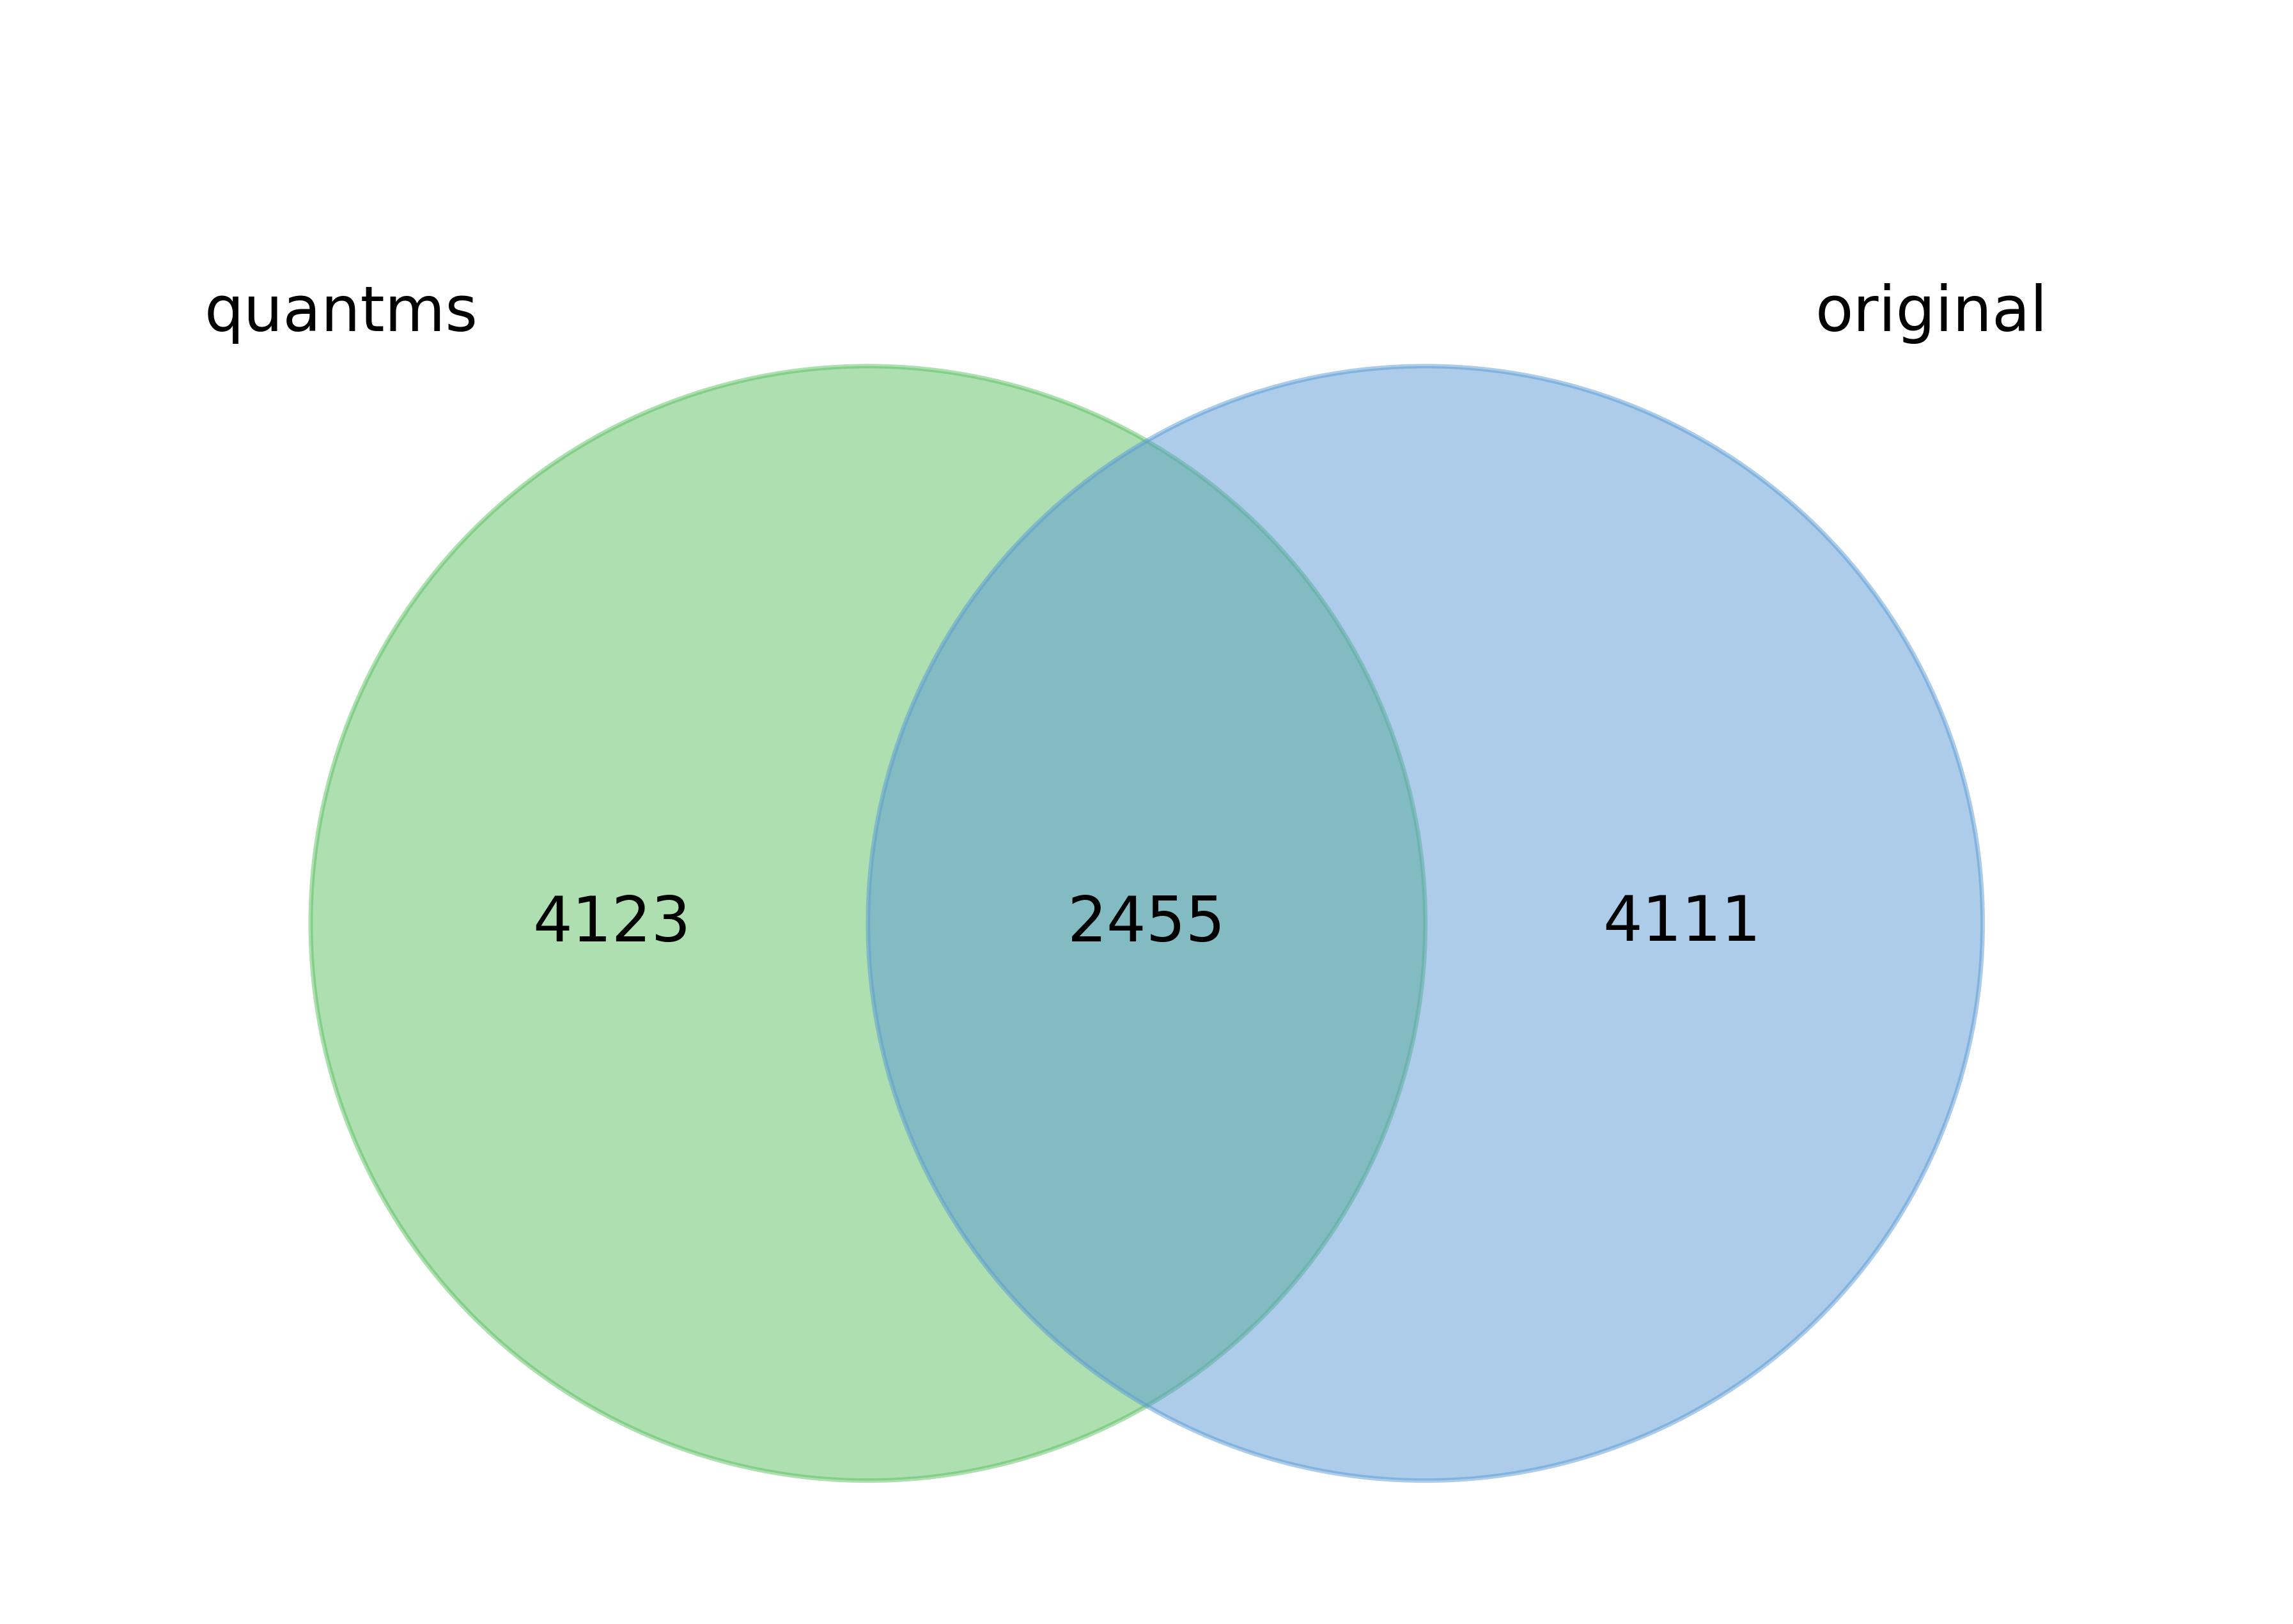

In [6]:
from pyvenn import venn
quantms["ProteinEntry"] = quantms.apply(lambda x: ";".join(sorted(x.ProteinName.split("|")[1::2])), axis=1)
original['Protein IDs'] = original.apply(lambda x: ";".join(sorted(x['Protein IDs'].split(";"))), axis=1)

labels = venn.get_labels([set(quantms["ProteinEntry"]), set(original['Protein IDs'])], fill=['number'])
fig, ax = venn.venn2(labels, names=['quantms', 'original'], dpi=500)
ax.get_legend().remove()
plt.show()

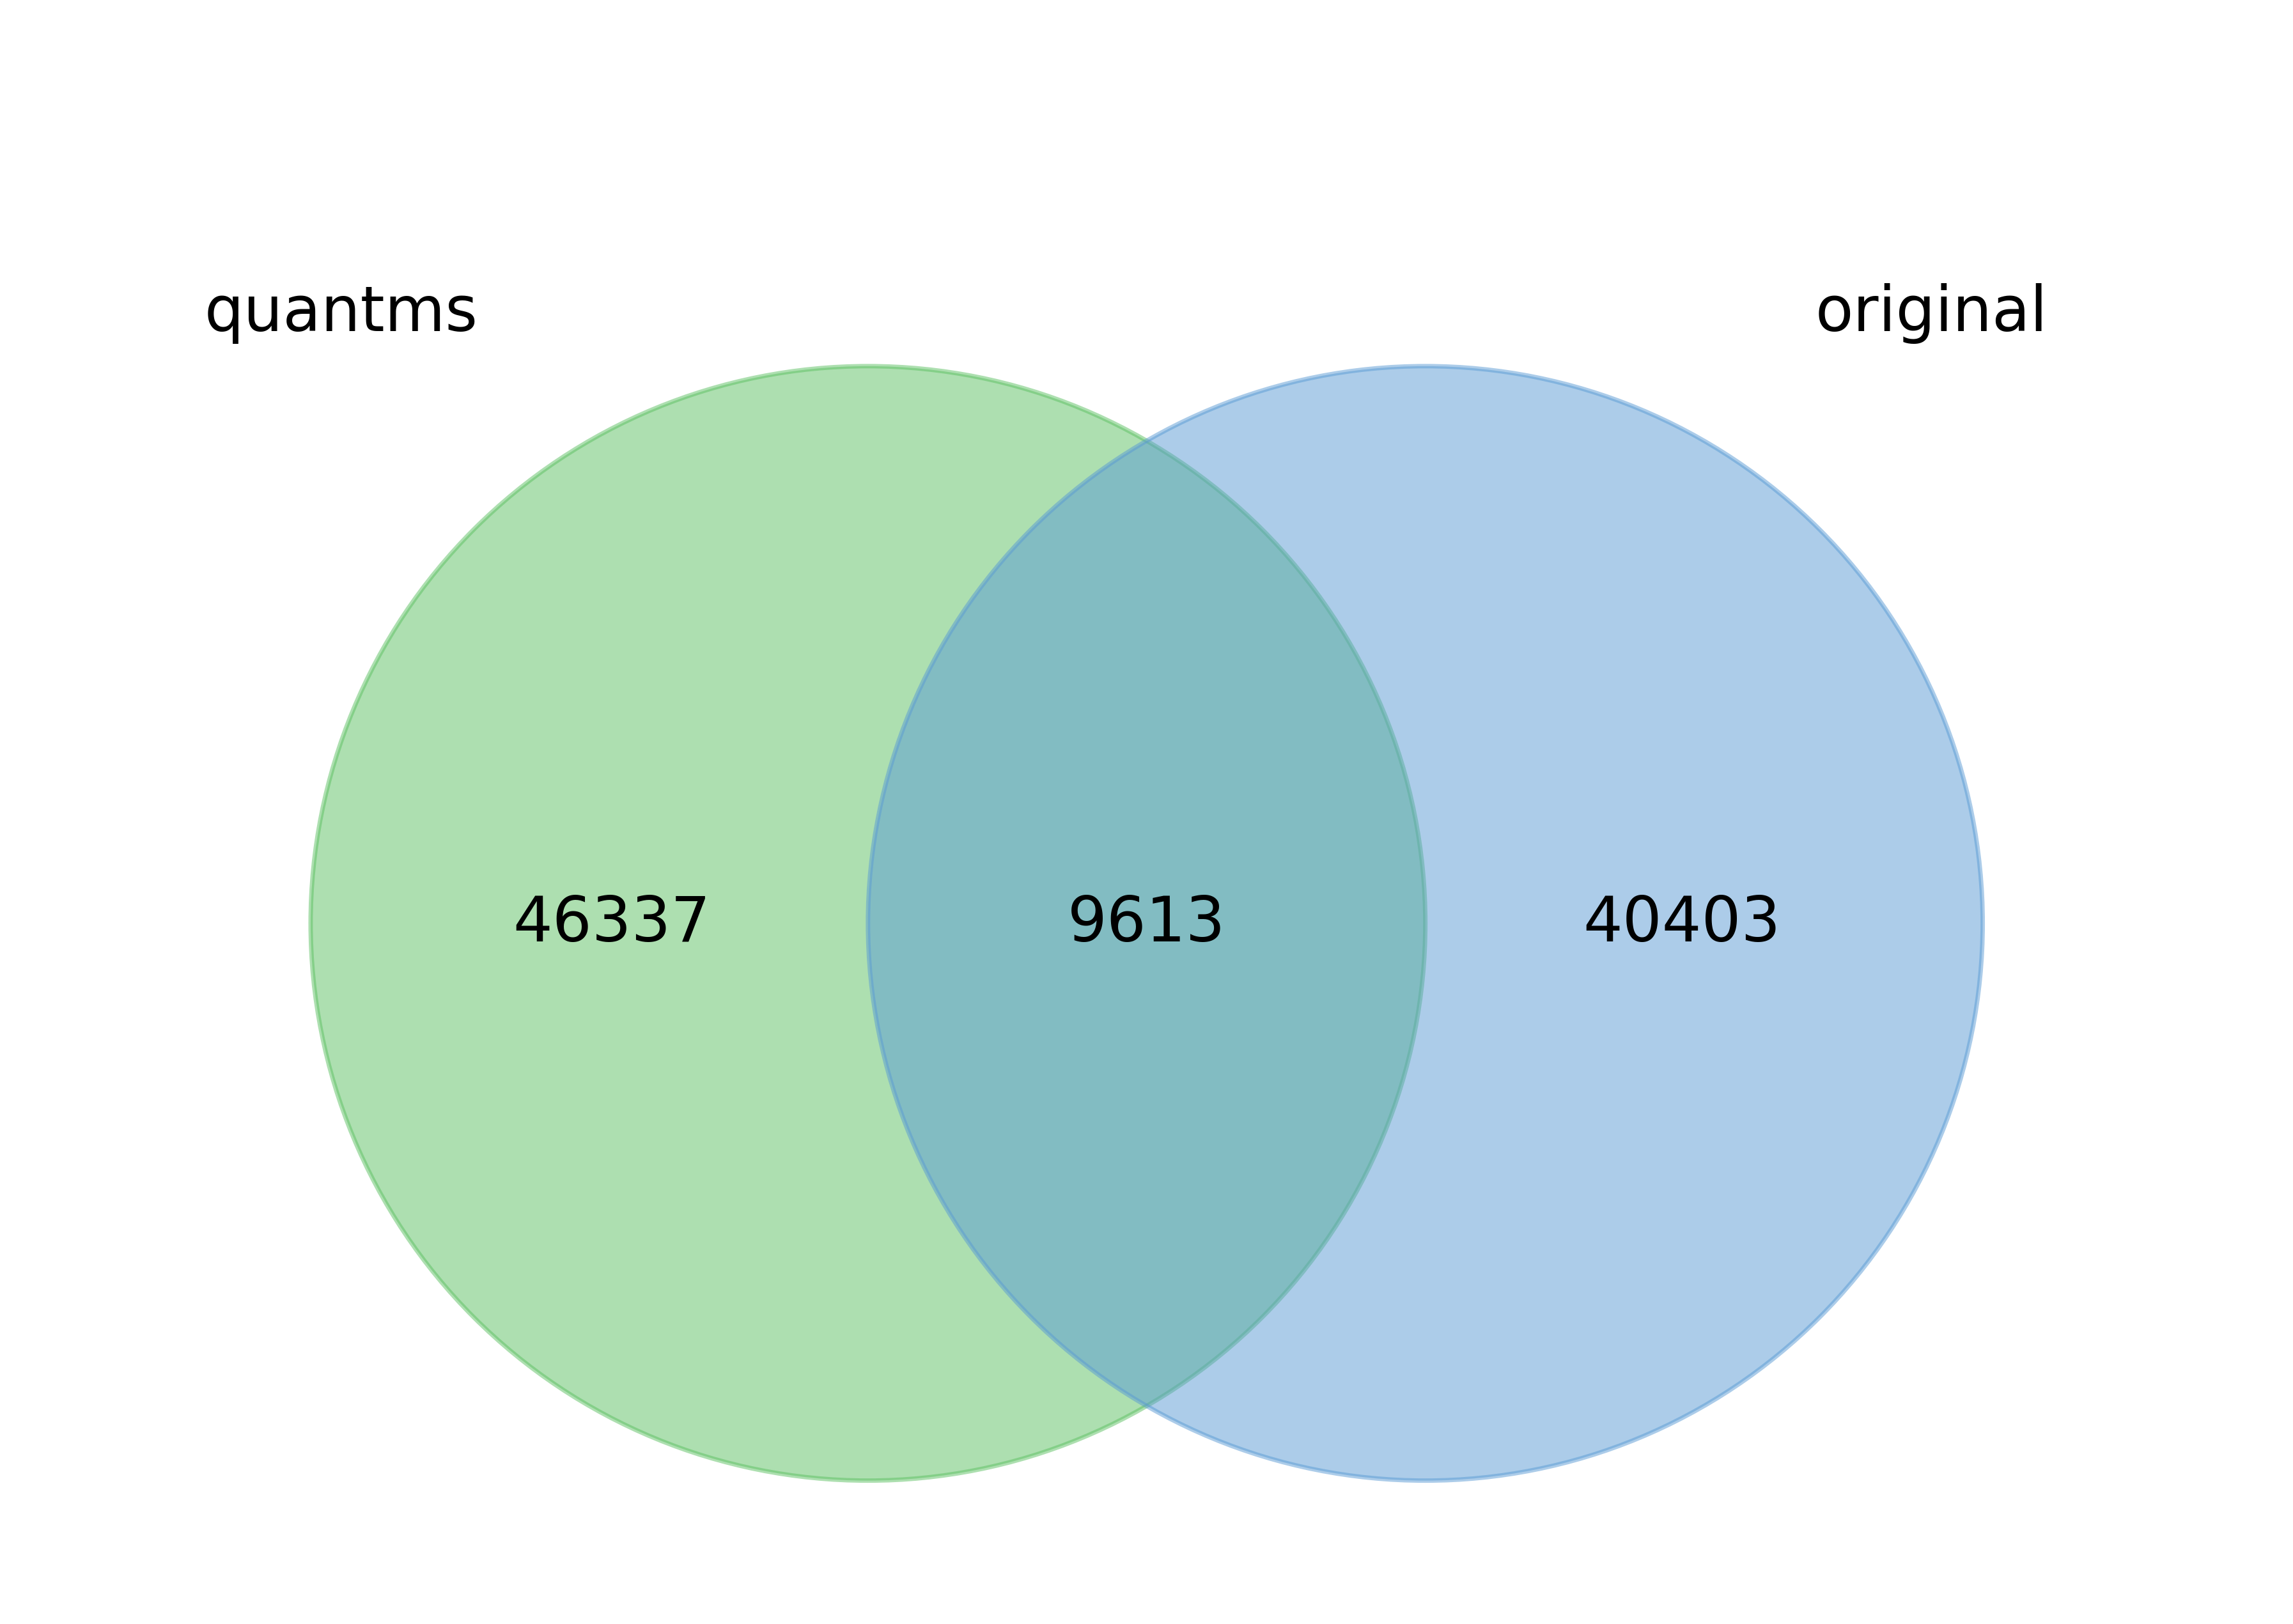

In [9]:
from pyteomics import mztab
original_peptides = pd.read_csv("./peptides.txt", sep='\t', header=0)
original_peptides = original_peptides[(original_peptides['Reverse'] != "+") & (original_peptides['Contaminant'] != "+")]

quantms_mztab = mztab.MzTab("./out.mzTab")
quantms_pep = quantms_mztab.peptide_table
quantms_pep = quantms_pep[quantms_pep['opt_global_cv_MS:1002217_decoy_peptide'] != 1]
labels = venn.get_labels([set(quantms_pep['sequence']), set(original_peptides['Sequence'])], fill=['number'])
fig, ax = venn.venn2(labels, names=['quantms', 'original'], dpi=500)
ax.get_legend().remove()
plt.show()


In [7]:
original[original['Fasta headers'].str.contains("ECOLI")].head()

,Protein IDs,Majority protein IDs,Peptide counts (all),Peptide counts (razor+unique),Peptide counts (unique),Protein names,Gene names,Fasta headers,Number of proteins,Peptides,...,Contaminant,id,Peptide IDs,Peptide is razor,Mod. peptide IDs,Evidence IDs,MS/MS IDs,Best MS/MS,Oxidation (M) site IDs,Oxidation (M) site positions
519,B8LFD6;P00722,P00722;B8LFD6,5;5,5;5,5;5,Beta-galactosidase;Beta-galactosidase 2,lacZ;lacZ2,>sp|P00722|BGAL_ECOLI Beta-galactosidase OS=Es...,2,5,...,NaN,519,7258;19264;34214;48094;50334,True;True;True;True;True,7760;20382;36476;51132;53496,253922;253923;253924;253925;253926;253927;2539...,161828;161829;400468;698325;698326;976541;9765...,161828;400468;698326;976542;1019093,NaN,NaN
534,C3UPD1;P0A832,C3UPD1;P0A832,2;2,2;2,2;2,SsrA-binding protein,smpB,>tr|C3UPD1|C3UPD1_ECOLI SmpB (Fragment) OS=Esc...,2,2,...,NaN,534,2925;8444,True;True,3167;8986,108582;108583;108584;108585;108586;108587;1085...,68845;68846;68847;68848;68849;68850;68851;6885...,68853;182606,NaN,NaN
753,D9IX93;P75797,P75797;D9IX93,10;10,10;10,10;10,Glutathione-binding protein gsiB,gsiB,>sp|P75797|GSIB_ECOLI Glutathione-binding prot...,2,10,...,NaN,753,7507;7559;10173;11767;31205;35786;36253;38500;...,True;True;True;True;True;True;True;True;True;True,8019;8071;10785;12462;33249;38121;38610;40949;...,262499;262500;264088;264089;264090;264091;2640...,167116;167820;167821;213266;213267;213268;2132...,167116;167820;213275;247204;644583;722408;7291...,NaN,NaN
1991,P00350,P00350,30,30,30,"6-phosphogluconate dehydrogenase, decarboxylating",gnd,>sp|P00350|6PGD_ECOLI 6-phosphogluconate dehyd...,1,30,...,NaN,1991,417;492;1199;1200;5368;7274;7357;7677;8036;803...,True;True;True;True;True;True;True;True;True;T...,437;517;1268;1269;5762;7777;7863;8191;8559;856...,15835;15836;15837;15838;15839;15840;15841;1584...,10336;10337;10338;10339;10340;10341;10342;1034...,10362;12052;27031;27060;123920;162350;164245;1...,511;512;513;514,11;14;184;194
1992,P00363,P00363,25,25,25,Fumarate reductase flavoprotein subunit,frdA,>sp|P00363|FRDA_ECOLI Fumarate reductase flavo...,1,25,...,NaN,1992,201;436;2868;4584;5356;6421;6503;10340;12951;1...,True;True;True;True;True;True;True;True;True;T...,208;457;3106;3107;4937;5750;6855;6945;10960;13...,7148;7149;7150;7151;7152;7153;7154;7155;7156;7...,4624;4625;4626;4627;4628;4629;4630;4631;4632;4...,4663;10589;67493;109798;123858;144347;146337;2...,515;516;517,191;214;216


In [8]:
quantms["ProteinEntry"].head()

0    Q86U42
1    Q86U42
2    Q86U42
3    Q86U42
4    Q86U42
Name: ProteinEntry, dtype: object

### Reproducibility between Analytical Replicate before msstats process

#### CV Within E Coli Proteins

C:\Users\ChengXin\MyProgram\python\anaconda\pro\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


22.074864574935035
29.435395892502164
22.426283713206637
27.627134423869776
27.718160106645744
34.15850020742277
26.86283853106883
32.9525059857383


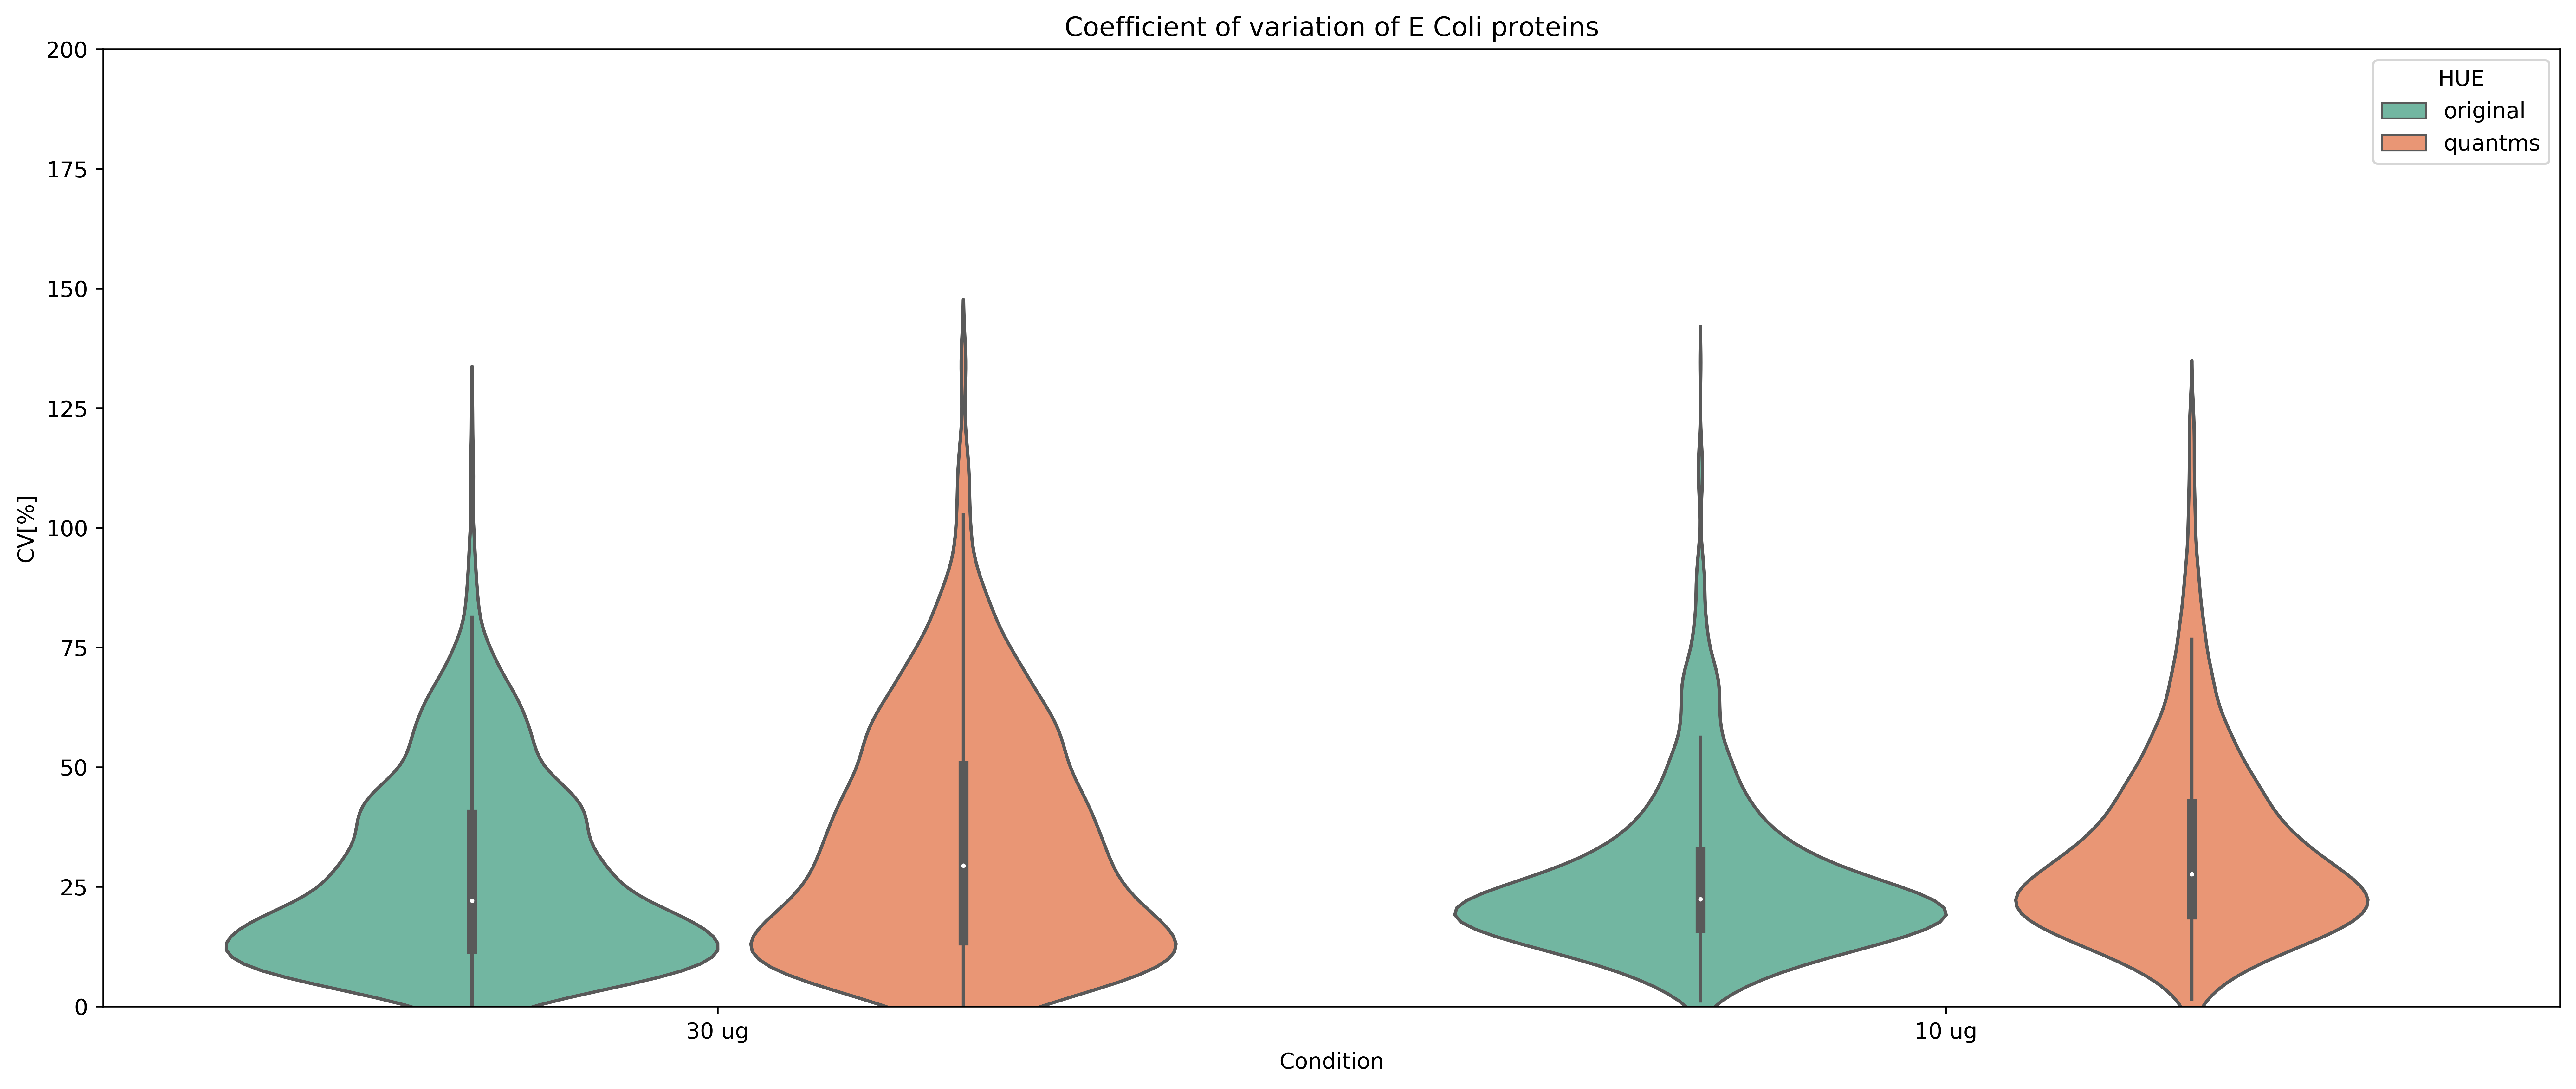

In [27]:
original_ecoli = original[original['Fasta headers'].str.contains("ECOLI")]
original_cv = original_ecoli[['Intensity H1', 'Intensity H2', 'Intensity H3']]
original_cv.columns = ['TechRep1','TechRep2', 'TechRep3']
original_cv = original_cv.copy()
original_cv['Condition'] = "30 ug"

temp = original_ecoli[['Intensity L1', 'Intensity L2', 'Intensity L3']]
temp.columns = ['TechRep1','TechRep2', 'TechRep3']
temp = temp.copy()
temp['Condition'] = "10 ug"
original_cv = original_cv.append(temp)
original_cv['HUE'] = "original"
original_cv = original_cv[(original_cv.T != 0).any()]
original_cv['CV[%]'] = original_cv.apply(lambda x: np.std(x[:3]) / np.mean(x[:3]) * 100, axis=1)

n_data = pd.DataFrame(None,columns = ['TechRep1','TechRep2', 'TechRep3', 'Condition', "CV[%]", "HUE"])
for condition in np.unique(quantms['Condition']):
    quant_condition = quantms.loc[(quantms['ProteinName'].str.contains("ECOLI")) & (quantms['Condition'] == condition)]

    for protein in np.unique(quant_condition['ProteinName']):
        t = quant_condition[quant_condition['ProteinName'] == protein]
        
        # sum intensity across fraction
        if condition == "10 ug":
            TechRep1 = np.sum(t[t['Run'].isin([i for i in range(1,25)])]['Intensity'])
            TechRep2 = np.sum(t[t['Run'].isin([i for i in range(25,49)])]['Intensity'])
            TechRep3 = np.sum(t[t['Run'].isin([i for i in range(49,73)])]['Intensity'])
        else:
            TechRep1 = np.sum(t[t['Run'].isin([i for i in range(73,97)])]['Intensity'])
            TechRep2 = np.sum(t[t['Run'].isin([i for i in range(97,121)])]['Intensity'])
            TechRep3 = np.sum(t[t['Run'].isin([i for i in range(121,145)])]['Intensity'])
            
        mean = np.mean([TechRep1, TechRep2, TechRep3])
        std = np.std([TechRep1, TechRep2, TechRep3])
        n_data = n_data.append({'TechRep1':TechRep1, 
                       'TechRep2': TechRep2, 'TechRep3': TechRep3, 
                       'Condition': condition, "CV[%]": 100 * (std / mean), "HUE": "quantms"}, ignore_index=True)
        
cv_data = original_cv.append(n_data)
cv_data = cv_data[(cv_data['TechRep1'] !=0.0) & (cv_data['TechRep2'] !=0.0) &
                 (cv_data['TechRep3'] !=0.0)]

print(np.median(cv_data[(cv_data['HUE'] == "original") & (cv_data['Condition'] == "30 ug")]["CV[%]"]))
print(np.median(cv_data[(cv_data['HUE'] != "original") & (cv_data['Condition'] == "30 ug")]["CV[%]"]))
print(np.median(cv_data[(cv_data['HUE'] == "original") & (cv_data['Condition'] == "10 ug")]["CV[%]"]))
print(np.median(cv_data[(cv_data['HUE'] != "original") & (cv_data['Condition'] == "10 ug")]["CV[%]"]))

print(np.mean(cv_data[(cv_data['HUE'] == "original") & (cv_data['Condition'] == "30 ug")]["CV[%]"]))
print(np.mean(cv_data[(cv_data['HUE'] != "original") & (cv_data['Condition'] == "30 ug")]["CV[%]"]))
print(np.mean(cv_data[(cv_data['HUE'] == "original") & (cv_data['Condition'] == "10 ug")]["CV[%]"]))
print(np.mean(cv_data[(cv_data['HUE'] != "original") & (cv_data['Condition'] == "10 ug")]["CV[%]"]))

plt.figure(figsize=(20,8), dpi=500)
plt.ylim(0, 200)
plt.title("Coefficient of variation of E Coli proteins")
sns.violinplot(x = "Condition", y="CV[%]", data=cv_data, scale= "count", palette="Set2", hue="HUE")

plt.show()

# # calcualte average CV in UPS1 proteins without missing value
# cvs = []
# xticks = []
# plt.figure(figsize=(8,6), dpi=500)


# conditions = np.unique(n_data["Condition"])
# conditions = sorted(conditions, key= lambda x: float(x.replace(" ug", "")))
# for condition in conditions:
#     cvs.append(np.mean(n_data[n_data['Condition'] == condition]["CV[%]"]))
#     xticks.append(condition)
    
# plt.plot(range(2), cvs, linewidth=3, color='r', marker='o',markerfacecolor='blue', markersize=12)
# plt.xticks(range(2), xticks)
# for i in range(2):
#     plt.text(i-0.1, cvs[i], round(cvs[i], 2))
# plt.ylabel('CV[%]')
# plt.title('Coefficient of variation of E Coli proteins')
# plt.show()

#### Calcaulate CV of HUMAN Proteins

C:\Users\ChengXin\MyProgram\python\anaconda\pro\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


30.483506573624
41.83235783834918
22.114942401928328
32.20417070349239
33.424186863600006
44.600826647128144
26.765716239203112
37.02693858976255


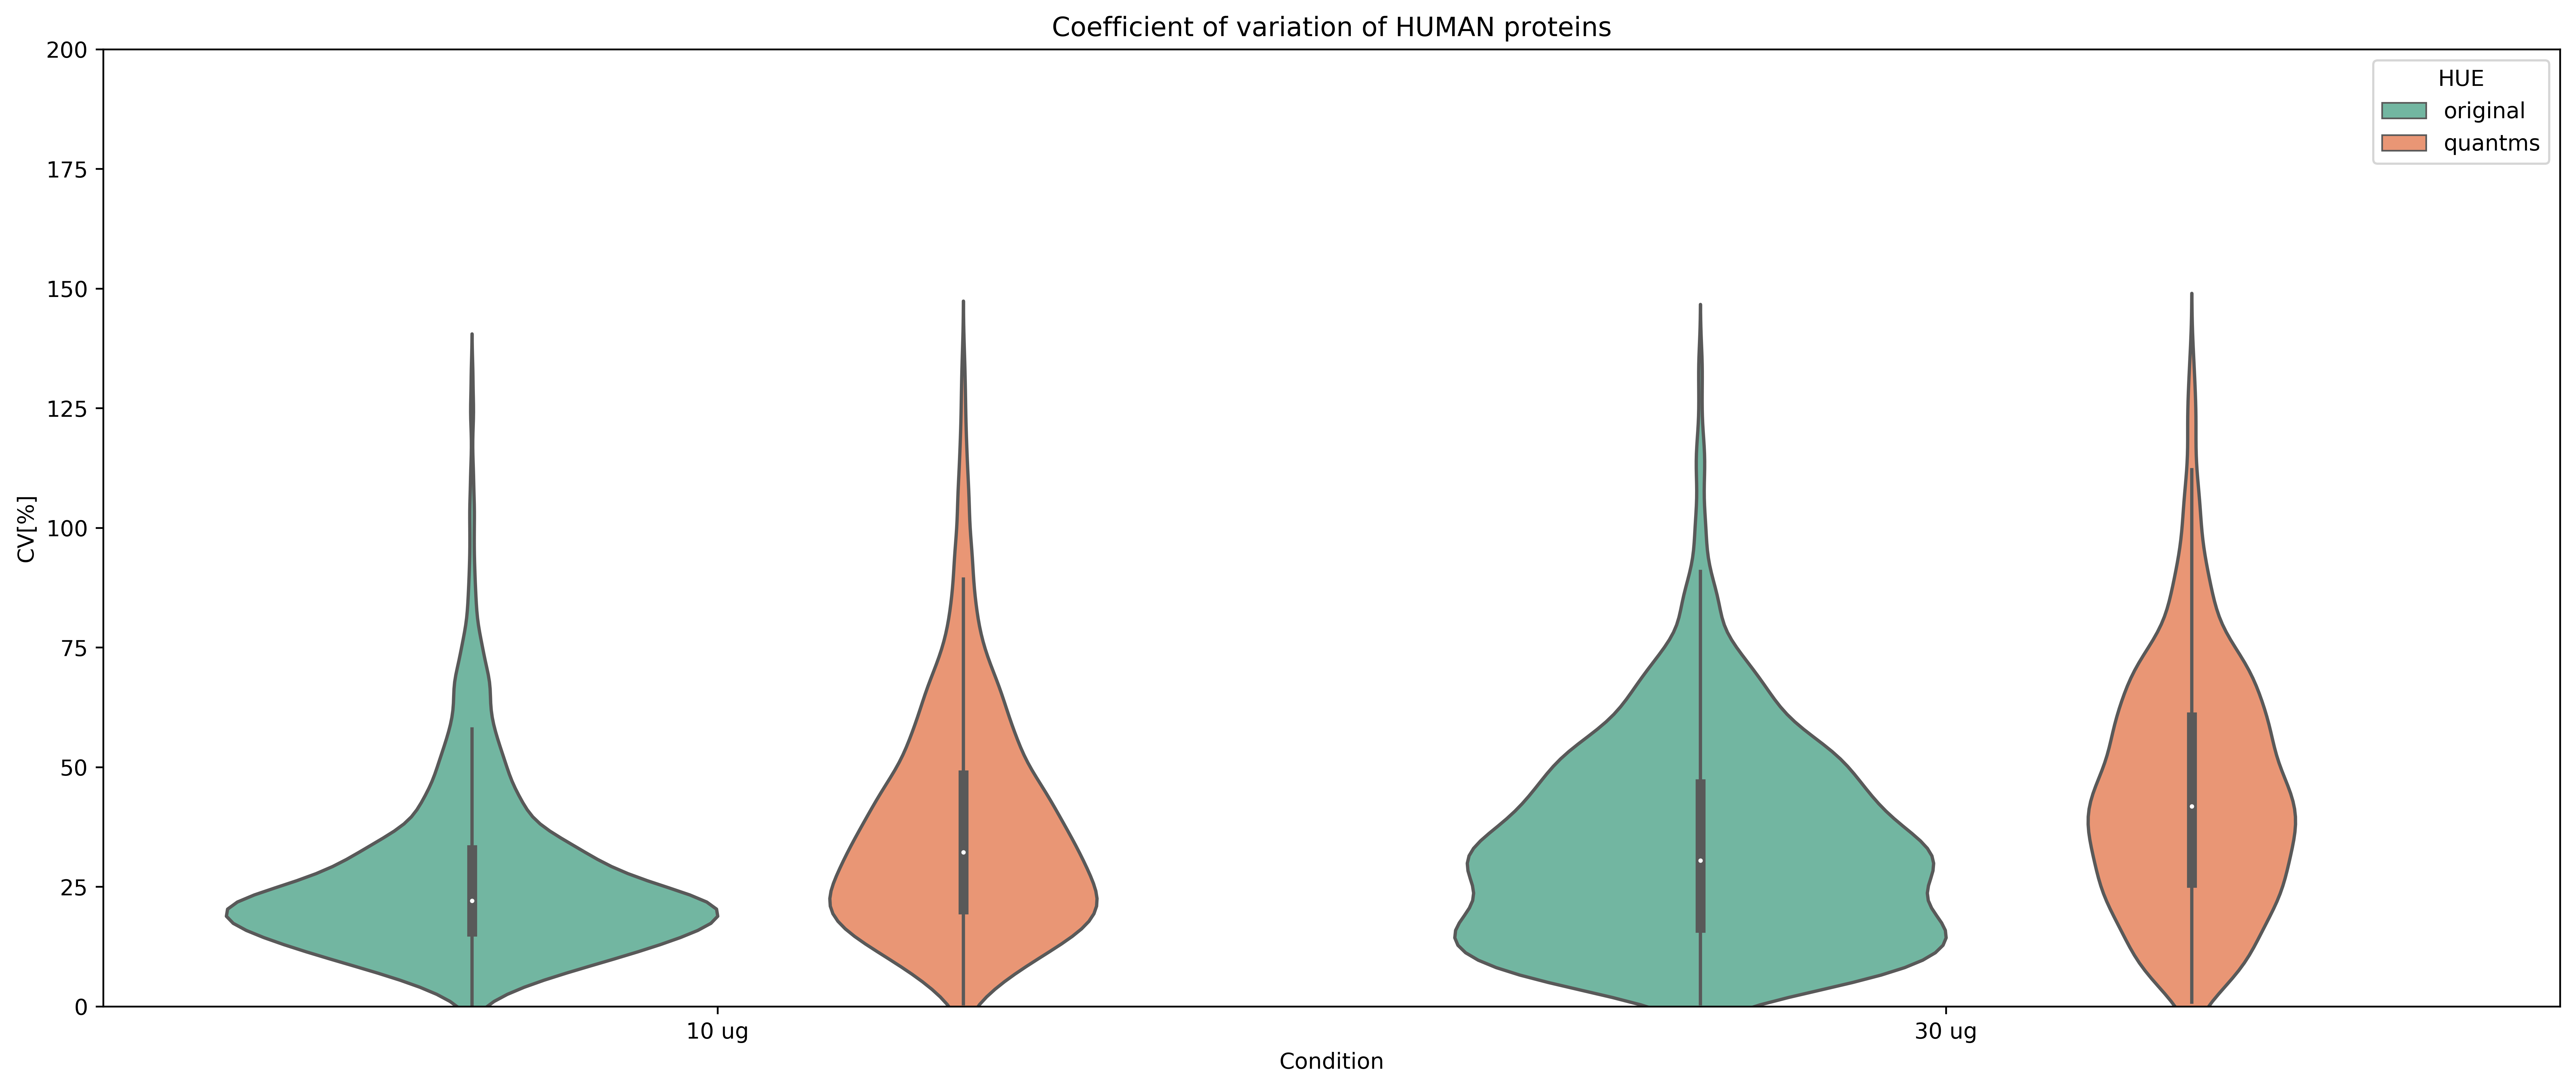

In [31]:
original_human = original[-original['Fasta headers'].str.contains("ECOLI")]
original_cv = original_human[['Intensity H1', 'Intensity H2', 'Intensity H3']]
original_cv.columns = ['TechRep1','TechRep2', 'TechRep3']
original_cv = original_cv.copy()
original_cv['Condition'] = "30 ug"

temp = original_human[['Intensity L1', 'Intensity L2', 'Intensity L3']]
temp.columns = ['TechRep1','TechRep2', 'TechRep3']
temp = temp.copy()
temp['Condition'] = "10 ug"
original_cv = original_cv.append(temp)
original_cv['HUE'] = "original"
original_cv = original_cv[(original_cv.T != 0).any()]
original_cv['CV[%]'] = original_cv.apply(lambda x: np.std(x[:3]) / np.mean(x[:3]) * 100, axis=1)


b_data = pd.DataFrame(None,columns = ['TechRep1','TechRep2', 'TechRep3', 'Condition', "CV[%]", "HUE"])
quantms_background = quantms[quantms['ProteinName'].str.contains("HUMAN")]
for condition in np.unique(quantms_background['Condition']):
    quantms_background_condition = quantms_background.loc[quantms_background['Condition'] == condition]
        
    for protein in np.unique(quantms_background_condition['ProteinName']):
        t = quantms_background_condition[quantms_background_condition['ProteinName'] == protein]
        
        # sum intensity across fraction
        if condition == "10 ug":
            TechRep1 = np.sum(t[t['Run'].isin([i for i in range(1,25)])]['Intensity'])
            TechRep2 = np.sum(t[t['Run'].isin([i for i in range(25,49)])]['Intensity'])
            TechRep3 = np.sum(t[t['Run'].isin([i for i in range(49,73)])]['Intensity'])
        else:
            TechRep1 = np.sum(t[t['Run'].isin([i for i in range(73,97)])]['Intensity'])
            TechRep2 = np.sum(t[t['Run'].isin([i for i in range(97,121)])]['Intensity'])
            TechRep3 = np.sum(t[t['Run'].isin([i for i in range(121,145)])]['Intensity'])
            
        mean = np.mean([TechRep1, TechRep2, TechRep3])
        std = np.std([TechRep1, TechRep2, TechRep3])
        
        b_data = b_data.append({'TechRep1':TechRep1, 
                       'TechRep2': TechRep2, 'TechRep3': TechRep3, 
                       'Condition': condition, "CV[%]": 100 * (std / mean), "HUE": "quantms"}, ignore_index=True)
cv_data = original_cv.append(b_data)
cv_data = cv_data[(cv_data['TechRep1'] !=0.0) & (cv_data['TechRep2'] !=0.0) &
                 (cv_data['TechRep3'] !=0.0)]

print(np.median(cv_data[(cv_data['HUE'] == "original") & (cv_data['Condition'] == "30 ug")]["CV[%]"]))
print(np.median(cv_data[(cv_data['HUE'] != "original") & (cv_data['Condition'] == "30 ug")]["CV[%]"]))
print(np.median(cv_data[(cv_data['HUE'] == "original") & (cv_data['Condition'] == "10 ug")]["CV[%]"]))
print(np.median(cv_data[(cv_data['HUE'] != "original") & (cv_data['Condition'] == "10 ug")]["CV[%]"]))

print(np.mean(cv_data[(cv_data['HUE'] == "original") & (cv_data['Condition'] == "30 ug")]["CV[%]"]))
print(np.mean(cv_data[(cv_data['HUE'] != "original") & (cv_data['Condition'] == "30 ug")]["CV[%]"]))
print(np.mean(cv_data[(cv_data['HUE'] == "original") & (cv_data['Condition'] == "10 ug")]["CV[%]"]))
print(np.mean(cv_data[(cv_data['HUE'] != "original") & (cv_data['Condition'] == "10 ug")]["CV[%]"]))

plt.figure(figsize=(20,8), dpi=500)
plt.ylim(0, 200)
plt.title("Coefficient of variation of HUMAN proteins")
sns.violinplot(x = "Condition", y="CV[%]", data=cv_data, scale= "count", palette="Set2", hue="HUE",
               order=['10 ug', '30 ug'])

plt.show()

### QCplots and Calculate FC

In [11]:
quantms = pd.read_csv("./out_msstats.csv", sep=',', header=0)
quantms['TechReplicate'] = quantms['Reference'].str[-6]
quantms.to_csv("out_msstats_tech.csv", sep=",", index=False)

In [35]:
%%R -w 800 -h 600

library('MSstats', warn.conflicts = F, quietly = T, verbose = F)
protein_expression = 'protein_expression.csv'

raw.om <- read.csv('out_msstats_tech.csv', header = TRUE, sep = ',')
raw.om <- raw.om[!grepl("DECOY", raw.om$ProteinName),]

quantms.proposed <- MSstats::dataProcess(raw = raw.om,
                                           normalization = 'equalizeMedians',
                                           summaryMethod = 'linear',
                                           censoredInt = "NA",
                                           MBimpute = TRUE)

Write the expression protein log values into the expression csv 
head(quantms.proposed$ProteinLevelData)
Protein.Expression <- quantms.proposed$ProteinLevelData[, c('Protein', 'LogIntensities', 'GROUP')]
head(Protein.Expression)
write.csv(Protein.Expression, file=protein_expression, row.names=FALSE)

INFO  [2021-12-20 21:24:07] ** Multiple fractionations exist: 24 fractionations per MS replicate.
INFO  [2021-12-20 21:25:19] ** Features with one or two measurements across runs are removed.
INFO  [2021-12-20 21:25:19] ** Fractionation handled.
INFO  [2021-12-20 21:25:20] ** Updated quantification data to make balanced design. Missing values are marked by NA


R[write to console]: Aggregate function missing, defaulting to 'length'



INFO  [2021-12-20 21:25:21] ** Use all features that the dataset originally has.
INFO  [2021-12-20 21:25:22] 
 # proteins: 4219
 # peptides per protein: 1-210
 # features per peptide: 1-1
INFO  [2021-12-20 21:25:22] Some proteins have only one feature: 
 sp|O76013|KRT36_HUMAN;sp|O76014|KRT37_HUMAN;sp|O76015|KRT38_HUMAN,
 sp|O95399|UTS2_HUMAN;tr|Q5H8X8|Q5H8X8_HUMAN,
 sp|P0A7P5|RL34_ECOLI,
 sp|P0A7Q1|RL35_ECOLI,
 sp|P0AAF3|ARAG_ECOLI ...
INFO  [2021-12-20 21:25:22] 
                    10 ug 30 ug
             # runs     1     1
    # bioreplicates     1     1
 # tech. replicates     0     0
INFO  [2021-12-20 21:25:22] Some features are completely missing in at least one condition:  
 GLNVMQNLLTAHPDVQAVFAQNDEM(Oxidation)ALGALR_3_NA_0,
 GLNVMQNLLTAHPDVQAVFAQNDEM(Oxidation)ALGALR_4_NA_0,
 VGTLPSHLAALMQTNINVQTLLTEAILTENR_3_NA_0,
 DLVVLLFETALLSSGFSLEDPQTHSNR_4_NA_0,
 LVSSPC(Carbamidomethyl)C(Carbamidomethyl)IVTSTYGWTANM(Oxidation)ER_2_NA_0 ...
INFO  [2021-12-20 21:25:22]  == Start the summar

  |===============================================                       |  67%WARN  [2021-12-20 21:26:04] *** error : can't fit the model for  sp|Q15149|PLEC_HUMAN
WARN  [2021-12-20 21:26:04] *** error : can't fit the model for  sp|Q15545|TAF7_HUMAN
  |===============================================                       |  68%WARN  [2021-12-20 21:26:05] *** error : can't fit the model for  sp|Q16181|SEPT7_HUMAN;tr|A0A0U1RRE1|A0A0U1RRE1_HUMAN;tr|A0A0U1RRH9|A0A0U1RRH9_HUMAN;tr|E7EPK1|E7EPK1_HUMAN;tr|E7ES33|E7ES33_HUMAN;tr|G3V1Q4|G3V1Q4_HUMAN
  |================================================                      |  68%WARN  [2021-12-20 21:26:05] *** error : can't fit the model for  sp|Q16537|2A5E_HUMAN
  |================================================                      |  69%WARN  [2021-12-20 21:26:05] *** error : can't fit the model for  sp|Q46938|KDUI_ECOLI
  |=================================================                     |  69%WARN  [2021-12-20 21:26:06] *** error : can

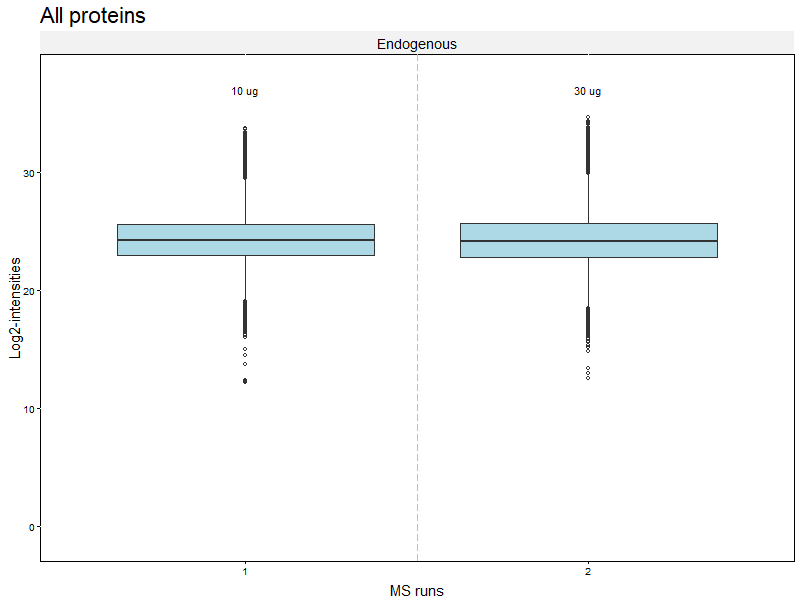

In [36]:
%%R -w 800 -h 600
tmp <- levels(quantms.proposed$ProcessedData$PROTEIN)
selector <- append('allonly', tmp, 1)
dataProcessPlots(data = quantms.proposed, type="QCPlot",which.Protein=selector,width=10, height=5, address=FALSE)

In [37]:
%%R -w 800 -h 600

Protein.Expression2 <- Protein.Expression[order(Protein.Expression$LogIntensities,decreasing = TRUE),]
protein_accession <- as.character(Protein.Expression2$Protein[1])
print(protein_accession)
tmp <- levels(quantms.proposed$ProcessedData$PROTEIN)
selector <- append(protein_accession, tmp, 1)
dataProcessPlots(data = quantms.proposed, type="QCPlot",which.Protein=selector,width=10, height=5, address=FALSE)

R[write to console]: Error in withVisible({ : object 'Protein.Expression' not found

R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: 
R[write to console]: In summary.lm(fit) :
R[write to console]:  essentially perfect fit: summary may be unreliable

R[write to console]: 2: 
R[write to console]: In summary.lm(fit) :
R[write to console]:  essentially perfect fit: summary may be unreliable

R[write to console]: 3: Removed 34468 rows containing non-finite values (stat_boxplot). 




Error in withVisible({ : object 'Protein.Expression' not found


RInterpreterError: Failed to parse and evaluate line '\nProtein.Expression2 <- Protein.Expression[order(Protein.Expression$LogIntensities,decreasing = TRUE),]\nprotein_accession <- as.character(Protein.Expression2$Protein[1])\nprint(protein_accession)\ntmp <- levels(quantms.proposed$ProcessedData$PROTEIN)\nselector <- append(protein_accession, tmp, 1)\ndataProcessPlots(data = quantms.proposed, type="QCPlot",which.Protein=selector,width=10, height=5, address=FALSE)\n'.
R error message: "Error in withVisible({ : object 'Protein.Expression' not found"

#### background proteins: Intensity shoud be identical in all MSrun

  |======================================================================| 100%
  |======================================================================| 100%


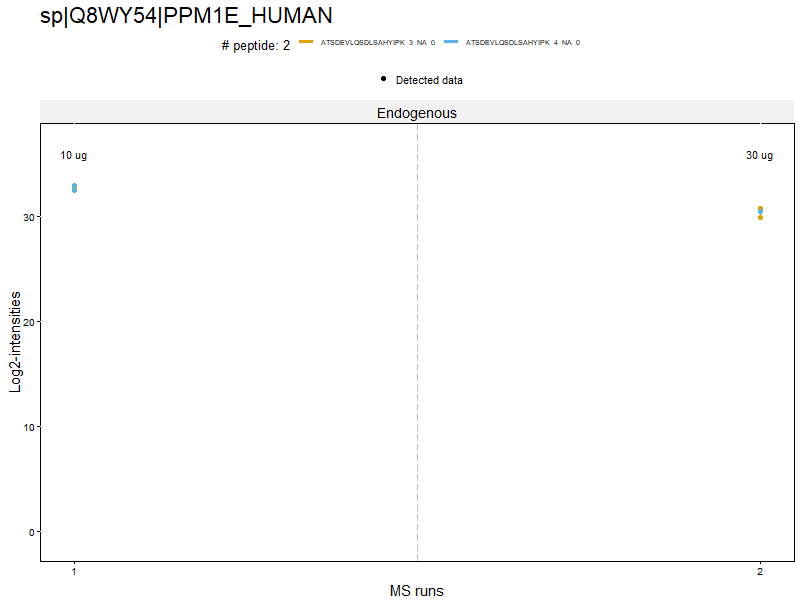

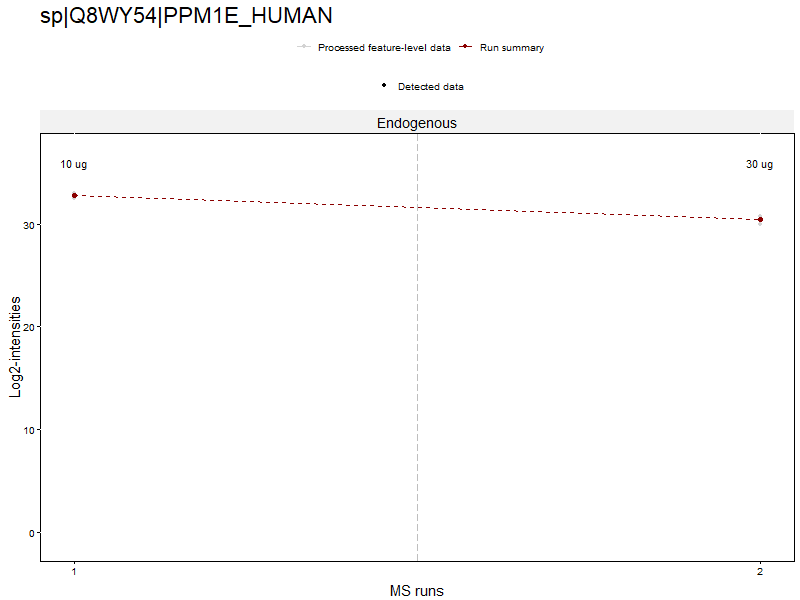

In [15]:
%%R -w 800 -h 600

tmp <- levels(quantms.proposed$ProcessedData$PROTEIN)
selector <- append(protein_accession, tmp, 1)
dataProcessPlots(data = quantms.proposed, type="ProfilePlot",which.Protein=selector,width=10, height=5, address=FALSE)

In [16]:
%%R -w 800 -h 600

tmp <- levels(quantms.proposed$ProcessedData$PROTEIN)
selector <- append("P04040ups|CATA_HUMAN_UPS", tmp, 1)
dataProcessPlots(data = quantms.proposed, type="ConditionPlot",which.Protein=selector,width=10, height=5, address=FALSE)

R[write to console]: Error in getSelectedProteins(protein, all_proteins) : 
  Please check protein name. Dataset does not have this protein. - P04040ups|CATA_HUMAN_UPS

R[write to console]: In addition: 
R[write to console]: Warning messages:

From cffi callback <function _consolewrite_ex at 0x000001FC5C038798>:
Traceback (most recent call last):
  File "C:\Users\ChengXin\MyProgram\python\anaconda\pro\lib\site-packages\rpy2\rinterface_lib\callbacks.py", line 132, in _consolewrite_ex
    s = conversion._cchar_to_str_with_maxlen(buf, n, _CCHAR_ENCODING)
  File "C:\Users\ChengXin\MyProgram\python\anaconda\pro\lib\site-packages\rpy2\rinterface_lib\conversion.py", line 133, in _cchar_to_str_with_maxlen
    s = ffi.string(c, maxlen).decode(encoding)
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 3: invalid start byte
From cffi callback <function _consolewrite_ex at 0x000001FC5C038798>:
Traceback (most recent call last):
  File "C:\Users\ChengXin\MyProgram\python\anacond


Error in getSelectedProteins(protein, all_proteins) : 
  Please check protein name. Dataset does not have this protein. - P04040ups|CATA_HUMAN_UPS


RInterpreterError: Failed to parse and evaluate line '\ntmp <- levels(quantms.proposed$ProcessedData$PROTEIN)\nselector <- append("P04040ups|CATA_HUMAN_UPS", tmp, 1)\ndataProcessPlots(data = quantms.proposed, type="ConditionPlot",which.Protein=selector,width=10, height=5, address=FALSE)\n'.
R error message: 'Error in getSelectedProteins(protein, all_proteins) : \n  Please check protein name. Dataset does not have this protein. - P04040ups|CATA_HUMAN_UPS'